In [2]:
import numpy
coeffs = [1,1]
for i in range(9):
    coeffs = numpy.convolve(coeffs, [1,1])

In [2]:
coeffs

array([  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1])

In [3]:
numpy.roots(coeffs)

array([-1.0486659 +0.01614412j, -1.0486659 -0.01614412j,
       -1.02925286+0.04166079j, -1.02925286-0.04166079j,
       -0.99899397+0.05030124j, -0.99899397-0.05030124j,
       -0.9701264 +0.03974754j, -0.9701264 -0.03974754j,
       -0.95296087+0.01496287j, -0.95296087-0.01496287j])

In [4]:
#Even if the the roots are exact, soliving it is difficult

In [5]:
import sympy
import scipy.signal

In [6]:
s, t =sympy.symbols('s, t')

In [7]:
G = ((-0.02621*s - 0.001)*sympy.exp(-2.66*s))/((7.85*s +1)*(14.63*s +1))

In [8]:
sympy.nsimplify(G)

(-2621*s/100000 - 1/1000)*exp(-133*s/50)/((157*s/20 + 1)*(1463*s/100 + 1))

In [9]:
 inverse =sympy.inverse_laplace_transform(sympy.nsimplify(G), s, t)

In [10]:
inverse

(829872*exp(100*t/1463 + 266/785)*gamma(-13560/229691)/157 + 30301*exp(20*t/157 + 2/11)*gamma(216131/229691))*exp(-44960*t/229691)*sin(13560*pi/229691)*Heaviside(t - 133/50)*gamma(13560/229691)/(259550830*pi)

In [11]:
sympy.N(inverse)

3.71275406944301e-9*(-92913.1413191932*exp(100*t/1463 + 266/785) + 31444.0411982817*exp(20*t/157 + 2/11))*exp(-44960*t/229691)*Heaviside(t - 133/50)

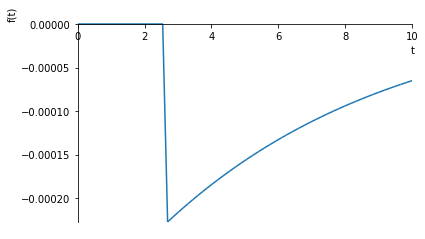

In [13]:
sympy.plot(inverse, (t, 0, 10))

In [14]:
import scipy.signal
import matplotlib.pyplot as plt
G = scipy.signal.lti([-0.001*26.21, -0.001*1], numpy.convolve([7.85,1], [14.63,1]))
t,y = scipy.signal.step(G)

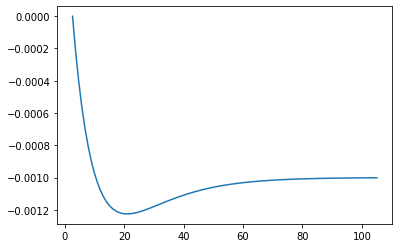

In [15]:
plt.plot((t + 2.66) , y)

In [16]:
import utils
s = utils.tf([1,0], 1)

In [17]:
s

tf([1. 0.], [1.])

In [18]:
import numpy

In [19]:
G = ((-0.02621*s - 0.001)*numpy.exp(-2.66*s))/((7.85*s +1)*(14.63*s +1))
G

tf([-2.282197e-04 -8.707400e-06], [1.         0.19574124 0.00870735], deadtime=2.66)

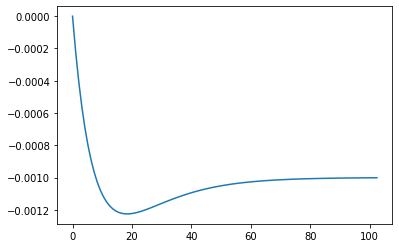

In [20]:
t, y = G.step()
plt.plot(t, y)

In [21]:
K = -1
omega = numpy.logspace(-2, 2)
s = 1j*omega
G = ((-0.02621*s - 0.001)*numpy.exp(-2.66*s))/((7.85*s +1)*(14.63*s +1))

In [22]:
T = K*G/(1 + K*G)

In [23]:
import utilsplot
#plt.plot.loglog frequency and gain plot for this using 

In [63]:
!pip install tbcontrol

In [24]:
from tbcontrol import blocksim

In [25]:
K = blocksim.LTI('K', 'e', -1, 1)
G = blocksim.LTI('G','u', 'yprime', [-0.001*26.21, 0.001*1], numpy.convolve([7.85, 1], [14.63,1]))

In [26]:
Gd =blocksim.LTI('Gd', 'd', 'yd', [0.001*26.21, -0.001*1], numpy.convolve([7.85,1], [14.63,1]))

In [27]:
blocks = [K, G, Gd]

In [28]:
sums ={'e':('+r','-y'),
       'y': ('+yprime', '+yd')}

In [29]:
inputs = {'r': blocksim.step(),
         'd': blocksim.step(starttime= 250)}

In [30]:
ts = numpy.arange(0, 500, 0.1)

In [31]:
diagram = blocksim.Diagram(blocks, sums, inputs)


In [33]:
result = diagram.simulate(ts, progress =True)

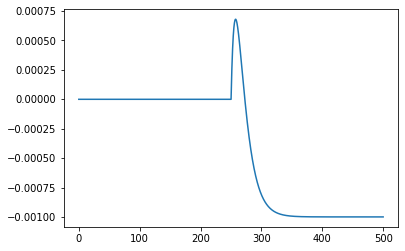

In [34]:
plt.plot(ts, result['y'])

In [35]:
G = numpy.array([[1/(s + 1), 2/(3*s +1)], [2/(2*s + 1), 3/(2*s +1)]])
w = numpy.array(numpy.logspace(-2, 2))
s = 1j*w

In [36]:
G  

array([[[9.99900010e-01-0.009999j  , 9.99854386e-01-0.01206617j,
         9.99787950e-01-0.0145604j , 9.99691211e-01-0.01756968j,
         9.99550359e-01-0.02119997j, 9.99345300e-01-0.02557872j,
         9.99046814e-01-0.03085899j, 9.98612433e-01-0.03722421j,
         9.97980497e-01-0.04489348j, 9.97061608e-01-0.05412724j,
         9.95726408e-01-0.06523288j, 9.93788275e-01-0.07856933j,
         9.90979135e-01-0.09454887j, 9.86916338e-01-0.11363309j,
         9.81058722e-01-0.13631767j, 9.72651295e-01-0.16309737j,
         9.60661719e-01-0.19439851j, 9.43720089e-01-0.23046146j,
         9.20089206e-01-0.27115505j, 8.87716691e-01-0.31571469j,
         8.44446961e-01-0.36243108j, 7.88475901e-01-0.4083891j ,
         7.19065448e-01-0.44945559j, 6.37354072e-01-0.48076383j,
         5.46853664e-01-0.49779989j, 4.53146336e-01-0.49779989j,
         3.62645928e-01-0.48076383j, 2.80934552e-01-0.44945559j,
         2.11524099e-01-0.4083891j , 1.55553039e-01-0.36243108j,
         1.12283309e-01-0

In [37]:
def G(s):
    return numpy.array([[4/(s + 1), 2/(3*s +1)], [2/(2*s + 1), 3/(2*s +1)]])


In [38]:
G(0)

array([[4., 2.],
       [2., 3.]])

In [39]:
w = numpy.logspace(-2,2, 1000)


In [40]:
#as = []
o_maxs = []
o_mins = []
for i in w:
    u, s, vh = numpy.linalg.svd(G(1j*i))
    o_max, o_min = s
    #as.append([o_max, o_min, 1])
    o_maxs.append(o_max)
    o_mins.append(o_min)

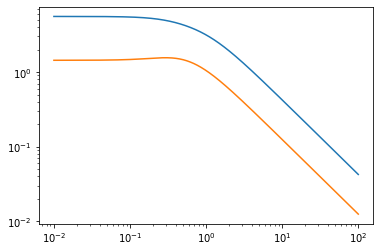

In [41]:
plt.loglog(w, o_maxs)
plt.loglog(w, o_mins)

In [42]:
r = []
ns = [1, 5, 4, 3]
for n in ns:
    r.append(n**2)
print(r)

[1, 25, 16, 9]


In [43]:
[n**2 for n in ns]

[1, 25, 16, 9]

In [44]:
#Relative gain array, in the open loop case, one control in auto adn one in manual
inv = numpy.linalg.inv
K = G(0)

In [45]:
K*inv(K).T

array([[ 1.5, -0.5],
       [-0.5,  1.5]])

In [54]:
#Relative gain array, in the open loop case, one control in auto adn one in manual
w = numpy.logspace(-2, 2)
K = G(1j)
inv = numpy.linalg.inv
A = K*inv(K).T
A

array([[ 1.14705882-0.08823529j, -0.14705882+0.08823529j],
       [-0.14705882+0.08823529j,  1.14705882-0.08823529j]])

In [53]:
A.sum(axis=1)

array([1.+8.32667268e-17j, 1.+1.38777878e-17j])

In [48]:
A.sum(axis=0)

array([1.+6.93889390e-17j, 1.+2.77555756e-17j])

In [49]:
A00 = [G(1j*i)*inv(G(1j*i).T)[0,0] for i in w]

ValueError: x and y can be no greater than 2-D, but have shapes (50,) and (50, 2, 2)

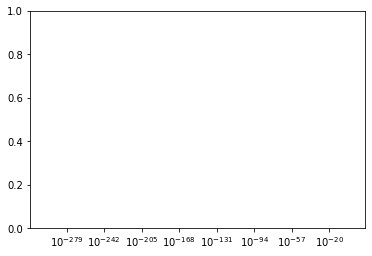

In [50]:
plt.semilogx(w, A00)
#A00

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])